# Exercice 1 - Digit classification system using different SVM classifiers

## Imports

In [ ]:
import gzip
import _pickle as cPickle

# Add your imports here
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

: 

## Exercise's steps

The objective of this exercise is to build a classification system able to classify the images of handwritten digits (0–9) coming from the MNIST database and using SVM with different types of kernels (linear, polynomial, RBF, ...). For that purpose, you will use the SVM library available in [_Scikit-learn_](http://scikit-learn.org).

### a. Getting the training and test sample sets from the MNIST database

#### a) Load MNIST digit dataset

In [80]:
# Load training, validation (not used in the PW) and test datasets
with gzip.open("mnist.pkl.gz", "rb") as f:
    train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")

# Print the shape of the various datasets
print("Training set:", len(train_set[0]))
print("Validation set:", len(valid_set[0]))
print("Test set:", len(test_set[0]))

Training set: 50000
Validation set: 10000
Test set: 10000


#### b) Visualize (plot) the images of some digits of the MNIST database

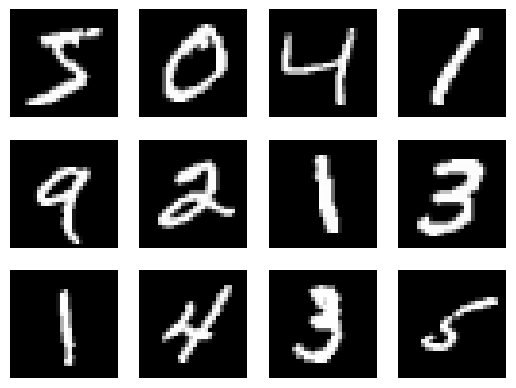

In [81]:
# Your code here
for index in range(12):
    plt.subplot(3, 4, index+1)
    plt.imshow(train_set[0][index].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

#### c) Build the final training and test sets, which should be balanced

In [82]:
# Your code here
train_size = 200
test_size = 100
train_set = [train_set[0][:train_size], train_set[1][:train_size]]
test_set = [test_set[0][:test_size], test_set[1][:test_size]]

### b. Classification of digits based on raw pixel values using SVM and different kernels

Create, train and test several SVM classifiers with different kernels (linear, polynomial, RBF, ...). For the training, perform a cross-validation using 10 folds, and test different with several $C$ and kernel parameter values (e.g. for $\gamma$ for RBF kernel) in order to get the best classifier. After the test, display the classification performances and confusion matrix of each SVM classifier (see class _metrics_).

Best score: 0.89 with parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


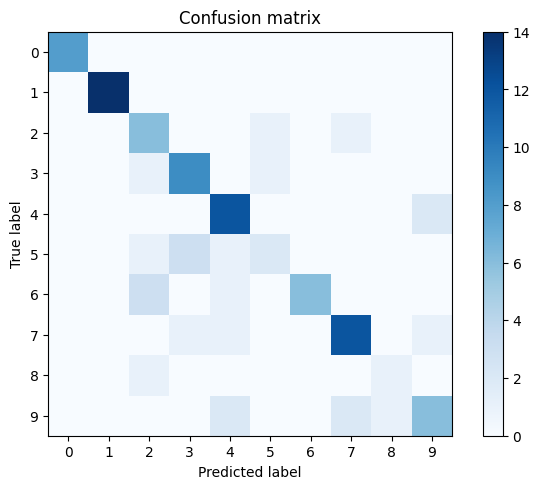

In [83]:
# Your code here
def get_best_parameters(train_set):
    best_score = 0
    best_parameters = {'C': None, 'gamma': None, 'kernel': None}

    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]:
            for kernel in ['linear', 'poly', 'rbf', 'sigmoid']: # rbf = gaussian en gros
                clf = svm.SVC(kernel=kernel, C=C, gamma=gamma)
                clf.fit(train_set[0], train_set[1])

                scores = cross_val_score(clf, train_set[0], train_set[1], cv=10)
                score = scores.mean()
                #print("Accuracy: %0.2f (+/- %0.2f)" % (score, scores.std() * 2))
                #print("Best score: %0.2f" % scores.max())
                #print("Standard deviation: %0.2f" % scores.std())

                if score > best_score:
                    best_score = score
                    best_parameters = {'C': C, 'gamma': gamma, 'kernel': kernel}

    return best_parameters, best_score

def plot_confusion_matrix(classifier, test_set):
    plt.imshow(confusion_matrix(test_set[1], classifier.predict(test_set[0])), interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    plt.xticks(np.arange(10), range(10))
    plt.yticks(np.arange(10), range(10))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

best_parameters, best_score = get_best_parameters(train_set)
print("Best score: %0.2f" % best_score + " with parameters: " + str(best_parameters))

clf = svm.SVC(kernel=best_parameters['kernel'], C=best_parameters['C'], gamma=best_parameters['gamma'])
clf.fit(train_set[0], train_set[1])

plot_confusion_matrix(clf, test_set)

### c. (Optional) Impact of preprocessing and feature extraction

Analyse the impact of the classification performances using the following preprocessing and feature extraction steps:

#### a) Preprocessing step: convert images to binary (i.e. black and white) representations 

In [84]:
# Your code here
train_set = [train_set[0] > 0, train_set[1]]
test_set = [test_set[0] > 0, test_set[1]]

#### b) Feature extraction steps:
* Horizontal and vertical projections (i.e. compute the sum of grey pixel values along the the X and Y-axis)
* Local binary patterns
* Any other usable image features that you may have found

In [85]:
# Your code here
train_set_v = np.sum(train_set[0], axis=0)
test_set_v = np.sum(test_set[0], axis=0)

train_set_h = np.sum(train_set[0], axis=1)
test_set_h = np.sum(test_set[0], axis=1)

# TODO ??

### d. Analysis of the results

Analyse the results obtained with the best SVM classifier.

a) Which kernel and parameters were used?

The best parameters are: C=10, gamma=scale, kernel=rbf

b) Which digit classes are the best/worse recognized against which? Why?

The best digit classes predicted are 1 and 7 whereas the worst digit classes predicted are 5 and 8. It seems like 1 and 7 are well predicted because they are not similar to other digits. 5 and 8 are not well predicted because they are similar to most of the other digits (5 looks like a 3, a 6 or even a 8 or 9 for example).

c) What is the impact of the sizes of the training and test sets on the classification performance?

The smaller the training set, the worse the classification performance is (same for the test set)

=> it seems like we increase accuracy but how long will it works this way ?